In [1]:
import numpy as np
import os

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
tf.__version__

'2.3.0'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
y_train_full.shape

(60000,)

In [9]:
X_train_full


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
y_train_full


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [12]:
X_valid.shape

(5000, 28, 28)

In [13]:
X_train.shape

(55000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

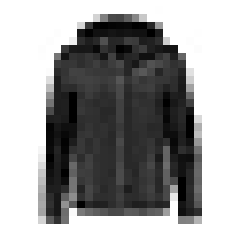

In [15]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [16]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [18]:
class_names[y_train[0]]

'Coat'

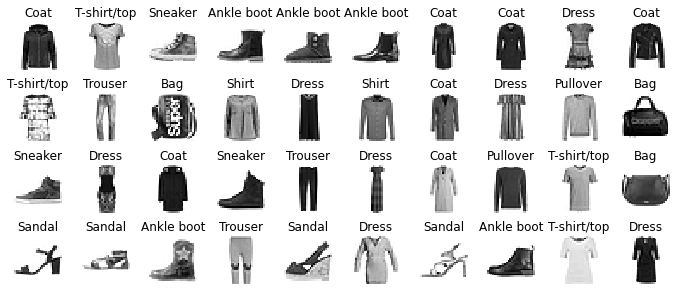

In [19]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

**Construct a Model**

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [21]:
keras.backend.clear_session()
np.random.seed(42)

In [22]:
model.layers

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [25]:
model.get_layer(hidden1.name) is hidden1

True

In [26]:
weights, biases = hidden1.get_weights()

In [27]:
weights

array([[-0.03989151, -0.07034602, -0.0624738 , ...,  0.00277865,
        -0.02349601,  0.06317879],
       [ 0.03864438,  0.05295096, -0.01386973, ..., -0.02017294,
        -0.0554928 , -0.00779463],
       [-0.05510885,  0.03859418, -0.06919317, ..., -0.05187059,
        -0.03857433, -0.00657899],
       ...,
       [-0.06647836, -0.05877954, -0.03447378, ...,  0.05585462,
         0.0271737 ,  0.0451759 ],
       [-0.00793882, -0.07400177,  0.0645742 , ..., -0.07403336,
        -0.02797004,  0.02422538],
       [-0.06831285,  0.0541684 ,  0.04041316, ...,  0.04781067,
         0.07433563, -0.00849374]], dtype=float32)

In [28]:
weights.shape

(784, 300)

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
biases.shape

(300,)

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [32]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7155 - accuracy: 0.7625 - val_loss: 0.5075 - val_accuracy: 0.8314
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4856 - accuracy: 0.8310 - val_loss: 0.4492 - val_accuracy: 0.8482
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4408 - accuracy: 0.8455 - val_loss: 0.4356 - val_accuracy: 0.8514
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4138 - accuracy: 0.8535 - val_loss: 0.3984 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3931 - accuracy: 0.8616 - val_loss: 0.3849 - val_accuracy: 0.8636
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3764 - accuracy: 0.8673 - val_loss: 0.3722 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3642 - accuracy: 0.8703 - val_loss: 0.3733 - val_accuracy:

In [33]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [34]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plot learning Curves**

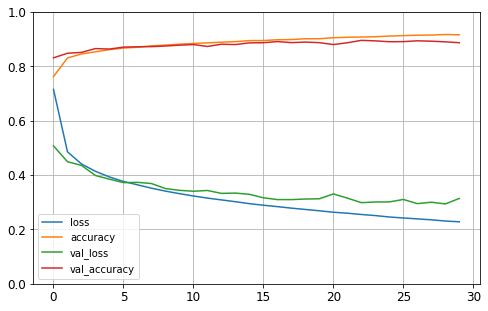

In [36]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [37]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3412 - accuracy: 0.8804


[0.34115204215049744, 0.8804000020027161]

In [38]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(6)

array([[2.00000e-06, 0.00000e+00, 8.00000e-06, 0.00000e+00, 1.00000e-06,
        3.82800e-03, 2.00000e-06, 8.38800e-03, 1.86000e-04, 9.87584e-01],
       [4.80000e-05, 0.00000e+00, 9.96436e-01, 0.00000e+00, 3.48600e-03,
        0.00000e+00, 3.00000e-05, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [2.00000e-06, 9.99997e-01, 0.00000e+00, 1.00000e-06, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]],
      dtype=float32)

In [39]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

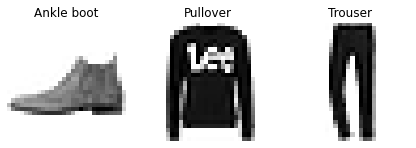

In [40]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**EXERCICE**

**1) Plot Learning curves when using different optimizers**




optimizers: Adam

In [41]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [42]:
history1 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3705 - accuracy: 0.8637 - val_loss: 0.3655 - val_accuracy: 0.8632
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3302 - accuracy: 0.8779 - val_loss: 0.3669 - val_accuracy: 0.8672
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3023 - accuracy: 0.8872 - val_loss: 0.3185 - val_accuracy: 0.8836
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2875 - accuracy: 0.8947 - val_loss: 0.3111 - val_accuracy: 0.8870
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2716 - accuracy: 0.8986 - val_loss: 0.3129 - val_accuracy: 0.8860
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2602 - accuracy: 0.9019 - val_loss: 0.3200 - val_accuracy: 0.8860
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2501 - accuracy: 0.9057 - val_loss: 0.3104 - val_accuracy:

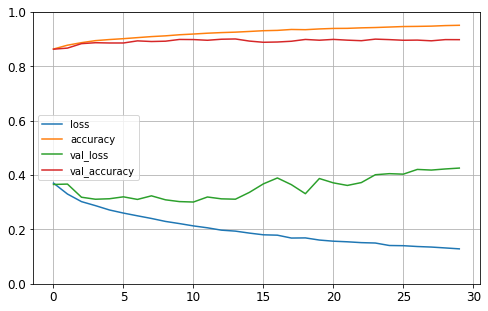

In [43]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [44]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4367 - accuracy: 0.8896


[0.43665093183517456, 0.8895999789237976]

optimizers:RMSprop

In [45]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [46]:
history2 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1296 - accuracy: 0.9512 - val_loss: 0.5876 - val_accuracy: 0.8988
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1366 - accuracy: 0.9509 - val_loss: 0.6242 - val_accuracy: 0.8940
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1432 - accuracy: 0.9494 - val_loss: 0.6643 - val_accuracy: 0.8952
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1528 - accuracy: 0.9478 - val_loss: 0.6721 - val_accuracy: 0.8952
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1541 - accuracy: 0.9457 - val_loss: 0.7815 - val_accuracy: 0.8990
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1595 - accuracy: 0.9471 - val_loss: 0.7264 - val_accuracy: 0.8950
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1666 - accuracy: 0.9444 - val_loss: 0.9025 - val_accuracy:

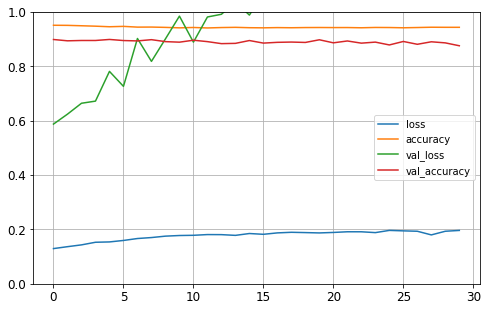

In [47]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [48]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.1478 - accuracy: 0.8731


[1.147841453552246, 0.8730999827384949]

optimizers:SGD

In [49]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="SGD",
              metrics=["accuracy"])

In [50]:
history3 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 4.8773 - accuracy: 0.4114 - val_loss: 1.2849 - val_accuracy: 0.5512
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 1.0698 - accuracy: 0.5916 - val_loss: 2.1400 - val_accuracy: 0.4826
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8363 - accuracy: 0.6820 - val_loss: 0.7837 - val_accuracy: 0.7672
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6952 - accuracy: 0.7501 - val_loss: 0.7521 - val_accuracy: 0.7408
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5822 - accuracy: 0.7868 - val_loss: 0.6878 - val_accuracy: 0.7872
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5134 - accuracy: 0.8147 - val_loss: 0.5145 - val_accuracy: 0.8266
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4636 - accuracy: 0.8319 - val_loss: 0.5125 - val_accuracy:

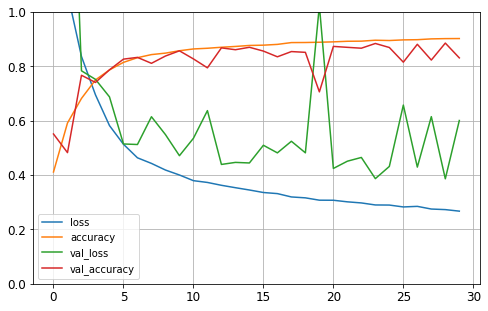

In [51]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [52]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6171 - accuracy: 0.8191


[0.6170614361763, 0.819100022315979]

**2) Plot Learning curves when using different batch size**

batch-size=32


In [53]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [54]:
history4 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2355 - accuracy: 0.9149 - val_loss: 0.4199 - val_accuracy: 0.8864
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2045 - accuracy: 0.9247 - val_loss: 0.3693 - val_accuracy: 0.8912
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1870 - accuracy: 0.9315 - val_loss: 0.3864 - val_accuracy: 0.8844
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1762 - accuracy: 0.9350 - val_loss: 0.3984 - val_accuracy: 0.8980
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1664 - accuracy: 0.9388 - val_loss: 0.3941 - val_accuracy: 0.8958
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1616 - accuracy: 0.9404 - val_loss: 0.4082 - val_accuracy: 0.8890
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1524 - accuracy: 0.9433 - val_loss: 0.4051 - val_accuracy:

In [55]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6578 - accuracy: 0.8849


[0.6578059792518616, 0.8848999738693237]

batch-size=64

In [56]:
history5 = model.fit(X_train, y_train, batch_size=64, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
860/860 [==============================] - 2s 3ms/step - loss: 0.0660 - accuracy: 0.9757 - val_loss: 0.6248 - val_accuracy: 0.8936
Epoch 2/30
860/860 [==============================] - 2s 2ms/step - loss: 0.0647 - accuracy: 0.9758 - val_loss: 0.6654 - val_accuracy: 0.8980
Epoch 3/30
860/860 [==============================] - 2s 2ms/step - loss: 0.0645 - accuracy: 0.9760 - val_loss: 0.6947 - val_accuracy: 0.8946
Epoch 4/30
860/860 [==============================] - 2s 2ms/step - loss: 0.0671 - accuracy: 0.9755 - val_loss: 0.6948 - val_accuracy: 0.8984
Epoch 5/30
860/860 [==============================] - 2s 2ms/step - loss: 0.0672 - accuracy: 0.9749 - val_loss: 0.6793 - val_accuracy: 0.8936
Epoch 6/30
860/860 [==============================] - 2s 2ms/step - loss: 0.0674 - accuracy: 0.9751 - val_loss: 0.7000 - val_accuracy: 0.8962
Epoch 7/30
860/860 [==============================] - 2s 2ms/step - loss: 0.0637 - accuracy: 0.9763 - val_loss: 0.6634 - val_accuracy: 0.8884
Epoch 

In [57]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9183 - accuracy: 0.8882


[0.9183245897293091, 0.8881999850273132]

In [58]:
history6 = model.fit(X_train, y_train, batch_size=128, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
430/430 [==============================] - 1s 2ms/step - loss: 0.0303 - accuracy: 0.9893 - val_loss: 0.8664 - val_accuracy: 0.8988
Epoch 2/30
430/430 [==============================] - 1s 2ms/step - loss: 0.0249 - accuracy: 0.9915 - val_loss: 0.8893 - val_accuracy: 0.9000
Epoch 3/30
430/430 [==============================] - 1s 2ms/step - loss: 0.0252 - accuracy: 0.9907 - val_loss: 0.9010 - val_accuracy: 0.8980
Epoch 4/30
430/430 [==============================] - 1s 2ms/step - loss: 0.0281 - accuracy: 0.9898 - val_loss: 0.8972 - val_accuracy: 0.8970
Epoch 5/30
430/430 [==============================] - 1s 2ms/step - loss: 0.0300 - accuracy: 0.9895 - val_loss: 0.9117 - val_accuracy: 0.9012
Epoch 6/30
430/430 [==============================] - 1s 2ms/step - loss: 0.0333 - accuracy: 0.9882 - val_loss: 0.9282 - val_accuracy: 0.8996
Epoch 7/30
430/430 [==============================] - 1s 2ms/step - loss: 0.0274 - accuracy: 0.9902 - val_loss: 0.9709 - val_accuracy: 0.8988
Epoch 

In [59]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.1939 - accuracy: 0.8897


[1.193876028060913, 0.8896999955177307]

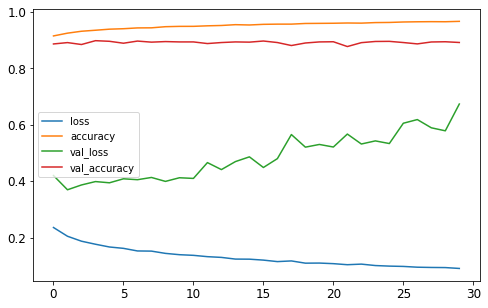

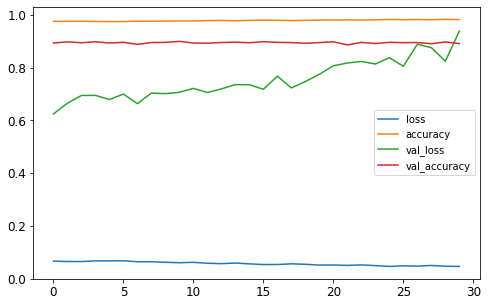

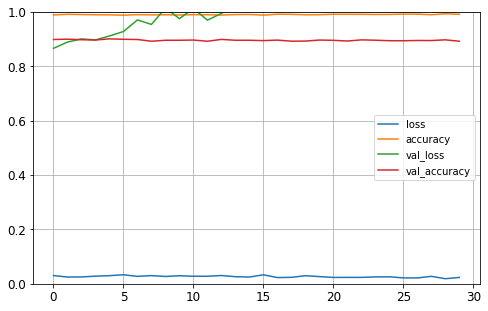

In [60]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
pd.DataFrame(history5.history).plot(figsize=(8, 5))
pd.DataFrame(history6.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


**3) Plot Learning curves when using different number of epochs**

epochs=10


In [61]:
history7 = model.fit(X_train, y_train, batch_size=32, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1017 - accuracy: 0.9693 - val_loss: 1.0481 - val_accuracy: 0.8908
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0500 - accuracy: 0.9826 - val_loss: 1.0409 - val_accuracy: 0.8950
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0569 - accuracy: 0.9793 - val_loss: 0.9929 - val_accuracy: 0.8938
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0536 - accuracy: 0.9809 - val_loss: 0.9715 - val_accuracy: 0.8920
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0522 - accuracy: 0.9809 - val_loss: 0.9775 - val_accuracy: 0.8908
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0513 - accuracy: 0.9814 - val_loss: 0.9268 - val_accuracy: 0.8940
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0496 - accuracy: 0.9813 - val_loss: 0.9512 - val_accuracy:

In [62]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9755 - accuracy: 0.8834


[0.9755067229270935, 0.883400022983551]

In [63]:
history8 = model.fit(X_train, y_train, batch_size=32, epochs=40,
                    validation_data=(X_valid, y_valid))

Epoch 1/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0495 - accuracy: 0.9826 - val_loss: 0.9345 - val_accuracy: 0.8830
Epoch 2/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0527 - accuracy: 0.9811 - val_loss: 0.9328 - val_accuracy: 0.8938
Epoch 3/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0504 - accuracy: 0.9815 - val_loss: 0.9966 - val_accuracy: 0.8922
Epoch 4/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0433 - accuracy: 0.9847 - val_loss: 0.9176 - val_accuracy: 0.8906
Epoch 5/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0468 - accuracy: 0.9833 - val_loss: 1.0060 - val_accuracy: 0.8940
Epoch 6/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0528 - accuracy: 0.9809 - val_loss: 0.9217 - val_accuracy: 0.8886
Epoch 7/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0444 - accuracy: 0.9843 - val_loss: 1.0276 - val_accuracy:

In [64]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.1435 - accuracy: 0.8854


[1.1435441970825195, 0.8853999972343445]

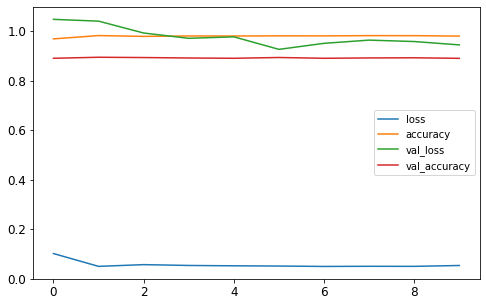

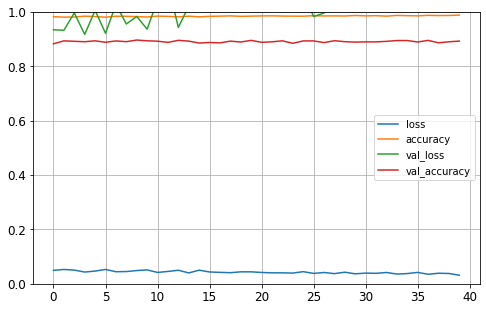

In [65]:
pd.DataFrame(history7.history).plot(figsize=(8, 5))
pd.DataFrame(history8.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**4) repeat with more layers**

In [66]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(200, activation="relu"))
model.add((keras.layers.Dropout(0.5)))
model.add(keras.layers.Dense(150, activation="relu"))
model.add((keras.layers.Dropout(0.5)))
model.add(keras.layers.Dense(80, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))

In [67]:
model.layers

In [68]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [69]:
history9 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0525 - accuracy: 0.6123 - val_loss: 0.5779 - val_accuracy: 0.7980
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7047 - accuracy: 0.7429 - val_loss: 0.4867 - val_accuracy: 0.8264
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6182 - accuracy: 0.7784 - val_loss: 0.4409 - val_accuracy: 0.8450
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5729 - accuracy: 0.7980 - val_loss: 0.4168 - val_accuracy: 0.8536
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5455 - accuracy: 0.8086 - val_loss: 0.3986 - val_accuracy: 0.8612
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5197 - accuracy: 0.8170 - val_loss: 0.3865 - val_accuracy: 0.8654
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4998 - accuracy: 0.8253 - val_loss: 0.3773 - val_accuracy:

In [70]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3626 - accuracy: 0.8734


[0.36259594559669495, 0.8733999729156494]

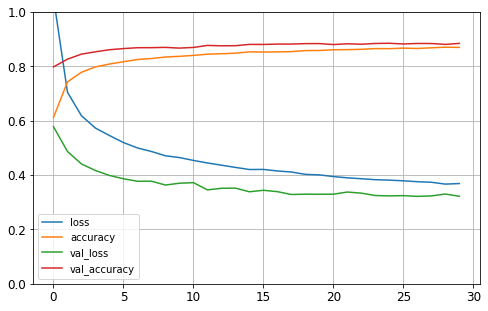

In [71]:
pd.DataFrame(history9.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**5) apply on different datasets**

In [72]:
data = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [73]:
X_train_full.shape

(60000, 28, 28)

In [74]:
y_train_full

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [75]:
X_valid, X_train = X_train_full[:10000] / 255., X_train_full[10000:] / 255.
y_valid, y_train = y_train_full[:10000], y_train_full[10000:]
X_test = X_test / 255.

In [76]:
class_names = ["0", "1", "2", "3", "4","5", "6", "7", "8", "9"]

In [77]:
class_names[y_train[0]]

'3'

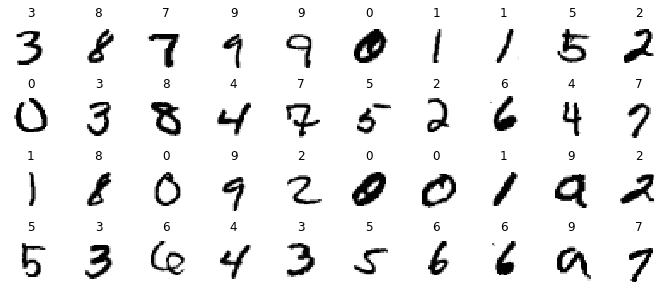

In [78]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

In [79]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add((keras.layers.Dropout(0.5)))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))

In [80]:
keras.backend.clear_session()
np.random.seed(42)

In [81]:
model.layers

In [82]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2010      
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [83]:
hidden1 = model.layers[3]
hidden1.name

'dense_6'

In [84]:
model.get_layer(hidden1.name) is hidden1

True

In [85]:
weights, biases = hidden1.get_weights()

In [86]:
weights

array([[-0.00245392, -0.00602096,  0.04814493, ...,  0.06357379,
        -0.0136617 , -0.07653733],
       [ 0.07972515, -0.01286506,  0.0020035 , ...,  0.06107304,
        -0.0775451 ,  0.01149727],
       [-0.06089473, -0.01919118,  0.00145897, ...,  0.03122292,
        -0.08925256, -0.00695635],
       ...,
       [ 0.03486373,  0.06412899, -0.0653969 , ..., -0.06485048,
        -0.0226825 ,  0.04644137],
       [ 0.03850014, -0.08919113,  0.09642955, ...,  0.02609348,
         0.05432379, -0.05019447],
       [ 0.10646185, -0.0143425 , -0.03862379, ...,  0.07761914,
         0.06997741,  0.05786615]], dtype=float32)

In [87]:
weights.shape

(300, 200)

In [88]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [89]:
biases.shape

(200,)

In [90]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [91]:
history10 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4108 - accuracy: 0.8943 - val_loss: 0.1662 - val_accuracy: 0.9541
Epoch 2/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2102 - accuracy: 0.9417 - val_loss: 0.1345 - val_accuracy: 0.9638
Epoch 3/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1795 - accuracy: 0.9513 - val_loss: 0.1164 - val_accuracy: 0.9664
Epoch 4/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1593 - accuracy: 0.9566 - val_loss: 0.1076 - val_accuracy: 0.9701
Epoch 5/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1531 - accuracy: 0.9588 - val_loss: 0.1026 - val_accuracy: 0.9721
Epoch 6/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1410 - accuracy: 0.9618 - val_loss: 0.1019 - val_accuracy: 0.9718
Epoch 7/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1313 - accuracy: 0.9650 - val_loss: 0.1067 - val_accuracy:

In [92]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0912 - accuracy: 0.9783


[0.09122087061405182, 0.9782999753952026]

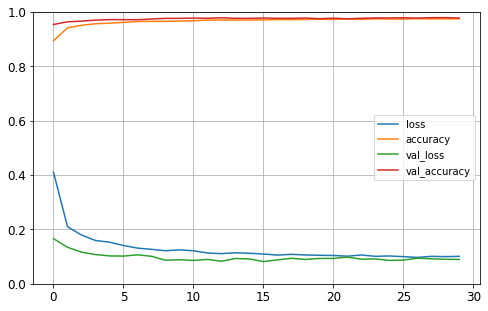

In [93]:
pd.DataFrame(history10.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
